# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats
import datetime
  
Current_Date_Formatted = datetime.datetime.today().strftime ('%m/%d/%Y')
print ('Current Date: ' + str(Current_Date_Formatted))

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Current Date: 10/20/2020


In [7]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [9]:
#original_cities = []
#original_cities = (cities)
#print(original_cities)

In [10]:
for city in cities:
    print(f"Processing Record {cities.index(city)} of Set 1 | {city}.")

Processing Record 0 of Set 1 | yellowknife.
Processing Record 1 of Set 1 | saint-ambroise.
Processing Record 2 of Set 1 | ushuaia.
Processing Record 3 of Set 1 | hobart.
Processing Record 4 of Set 1 | terrace.
Processing Record 5 of Set 1 | punta arenas.
Processing Record 6 of Set 1 | codrington.
Processing Record 7 of Set 1 | sibu.
Processing Record 8 of Set 1 | toora-khem.
Processing Record 9 of Set 1 | kuala terengganu.
Processing Record 10 of Set 1 | kiama.
Processing Record 11 of Set 1 | qaanaaq.
Processing Record 12 of Set 1 | tsihombe.
Processing Record 13 of Set 1 | mareeba.
Processing Record 14 of Set 1 | klaksvik.
Processing Record 15 of Set 1 | albany.
Processing Record 16 of Set 1 | udachnyy.
Processing Record 17 of Set 1 | victoria.
Processing Record 18 of Set 1 | fairbanks.
Processing Record 19 of Set 1 | saint-philippe.
Processing Record 20 of Set 1 | kodiak.
Processing Record 21 of Set 1 | dikson.
Processing Record 22 of Set 1 | okhotsk.
Processing Record 23 of Set 1 | 

In [11]:
time.sleep(1)
#print(cities)

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
#original_cities = ['kodiak', 'saint-francois', 'te anau', 'kargopol', 'bluff']

# set up lists to hold reponse info
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for citi in cities:
    
    try:
        response = requests.get(query_url + citi).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #print(json.dumps(response, indent=2))
        
    except KeyError:
        
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        country.append(None)
        date.append(None)


In [13]:
#print(not_found_cities)

## Convert Raw Data to DataFrame
* Save as csv

In [14]:
#create a df of the variables
weather_dict = {
   "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.46,-114.35,21.00,85.0,20.0,6.93,CA,1.603247e+09
1,saint-ambroise,48.55,-71.33,33.01,100.0,40.0,3.36,CA,1.603247e+09
2,ushuaia,-54.80,-68.30,41.00,75.0,40.0,4.85,AR,1.603247e+09
3,hobart,-42.88,147.33,68.00,51.0,40.0,5.82,AU,1.603247e+09
4,terrace,54.52,-128.60,39.20,93.0,90.0,2.24,CA,1.603247e+09


In [15]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

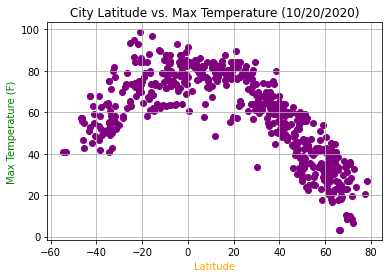

In [17]:
#lat vs temp scatter plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Max Temperature (F)", color = "green")
plt.title("City Latitude vs. Max Temperature" + " (" + str(Current_Date_Formatted) + ")")
plt.grid()
plt.savefig('Latitude vs. Temperature Plot.png')
plt.show()

### Latitude vs. Humidity Plot

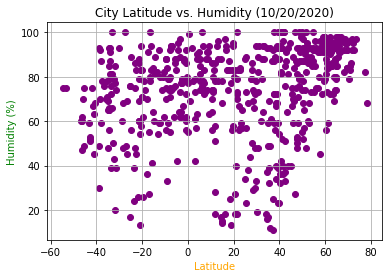

In [18]:
#lat vs humidity scatter plot
plt.scatter(weather_data['Lat'], weather_data['Humidity'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Humidity (%)", color = "green")
plt.title("City Latitude vs. Humidity" + " (" + str(Current_Date_Formatted) + ")")
plt.grid()
plt.savefig('Latitude vs. Humidity Plot.png')
plt.show()

### Latitude vs. Cloudiness Plot

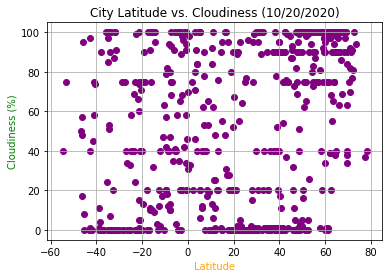

In [19]:
#lat vs humidity scatter plot
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Cloudiness (%)", color = "green")
plt.title("City Latitude vs. Cloudiness" + " (" + str(Current_Date_Formatted) + ")")
plt.grid()
plt.savefig('Latitude vs. Cloudiness Plot.png')
plt.show()

### Latitude vs. Wind Speed Plot

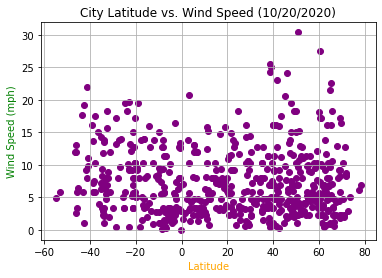

In [20]:
#lat vs humidity scatter plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Wind Speed (mph)", color = "green")
plt.title("City Latitude vs. Wind Speed" + " (" + str(Current_Date_Formatted) + ")")
plt.grid()
plt.savefig('Latitude vs. Wind Speed Plot.png')
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

In [15]:
# Perform a linear regression on temperature vs. latitude
x_values = weather_data['Lat'].dropna()
y_values = weather_data['Max Temp'].dropna()

# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

y = -0.37x + 67.36


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7805685994006424


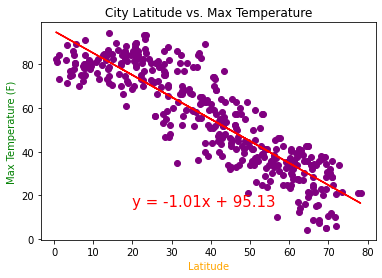

In [16]:
# Add the linear regression equation and line to plot
#x_values = weather_data['Lat']
x_values = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_values = weather_data['Max Temp'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Max Temp'].loc[weather_data['Lat'] >= 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Max Temperature (F)", color = "green")
plt.title("City Latitude vs. Max Temperature")
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6787726311303047


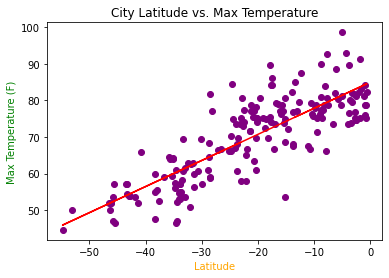

In [17]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] < 0]
y_values = weather_data['Max Temp'].loc[weather_data['Lat'] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] < 0], weather_data['Max Temp'].loc[weather_data['Lat'] < 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Max Temperature (F)", color = "green")
plt.title("City Latitude vs. Max Temperature")
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0834484073507666


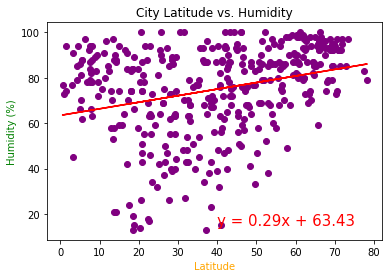

In [18]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_values = weather_data['Humidity'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Humidity'].loc[weather_data['Lat'] >= 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Humidity (%)", color = "green")
plt.title("City Latitude vs. Humidity")
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006394907853704202


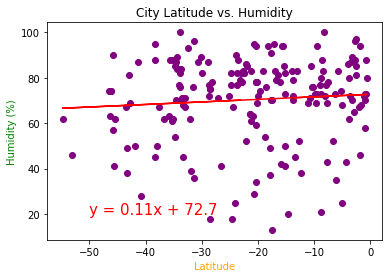

In [19]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] < 0]
y_values = weather_data['Humidity'].loc[weather_data['Lat'] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] < 0], weather_data['Humidity'].loc[weather_data['Lat'] < 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Humidity (%)", color = "green")
plt.title("City Latitude vs. Humidity")
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07581763951897726


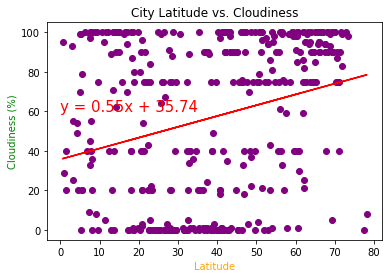

In [20]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_values = weather_data['Cloudiness'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Cloudiness'].loc[weather_data['Lat'] >= 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Cloudiness (%)", color = "green")
plt.title("City Latitude vs. Cloudiness")
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02045119569749028


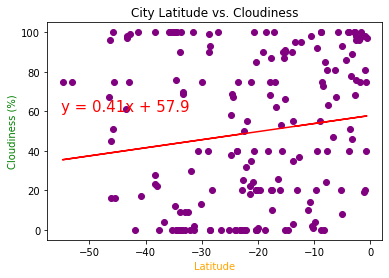

In [21]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] < 0]
y_values = weather_data['Cloudiness'].loc[weather_data['Lat'] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] < 0], weather_data['Cloudiness'].loc[weather_data['Lat'] < 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Cloudiness (%)", color = "green")
plt.title("City Latitude vs. Cloudiness")
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0022348392595508172


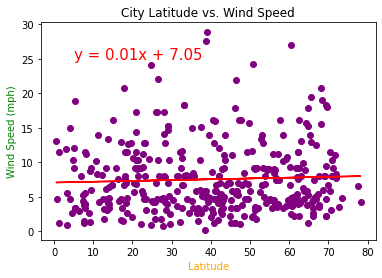

In [22]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_values = weather_data['Wind Speed'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Wind Speed'].loc[weather_data['Lat'] >= 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5, 25),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Wind Speed (mph)", color = "green")
plt.title("City Latitude vs. Wind Speed")
plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.009634030470717746


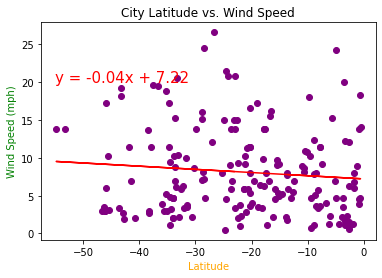

In [23]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] < 0]
y_values = weather_data['Wind Speed'].loc[weather_data['Lat'] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] < 0], weather_data['Wind Speed'].loc[weather_data['Lat'] < 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Wind Speed (mph)", color = "green")
plt.title("City Latitude vs. Wind Speed")
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

# Show plot
plt.show()